## Linear Regression Assignment

Build a model for predection of bike rental daily count base on th environmental and seasonal settings

### STEPS

 - Importing python packages
 - Reading, undertanding and visualize the data
 - Preparing Data
 - Training the model
 - Residual analisys
 - Predictions and evaluations on the test set

#### Step 0 - importing python packages and modules required for the creation of the model

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(np.__version__)
print(pd.__version__)
#print(matplotlib.pyplot.__version__)
print(sns.__version__)
print(sklearn.__version__)
print(sm.__version__)


1.20.3
1.3.4
0.11.2
0.24.2
0.12.2


#### Step 1 - Reading, understanding and visualizing the data

In [158]:
#Reading the data set
bikerenting =  pd.read_csv("day.csv")
#Checking some of the records
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [159]:
#only 2018
bikerenting = bikerenting[bikerenting['yr']==1]

In [160]:
#Data set structure
bikerenting.shape

(365, 16)

In [161]:
#Search for missing values
#rule : if 30% is null we should ignore the variable
bikerenting.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 365 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     365 non-null    int64  
 1   dteday      365 non-null    object 
 2   season      365 non-null    int64  
 3   yr          365 non-null    int64  
 4   mnth        365 non-null    int64  
 5   holiday     365 non-null    int64  
 6   weekday     365 non-null    int64  
 7   workingday  365 non-null    int64  
 8   weathersit  365 non-null    int64  
 9   temp        365 non-null    float64
 10  atemp       365 non-null    float64
 11  hum         365 non-null    float64
 12  windspeed   365 non-null    float64
 13  casual      365 non-null    int64  
 14  registered  365 non-null    int64  
 15  cnt         365 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 48.5+ KB


In [162]:
bikerenting.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,365.000000,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,548.000000,2.498630,1.0,6.526027,0.030137,2.986301,0.682192,1.367123,20.685256,24.110876,61.163873,12.703263,1021.095890,4589.156164,5610.252055
std,105.510663,1.110946,0.0,3.452584,0.171199,2.008862,0.466264,0.515703,7.222334,7.840748,13.400919,5.246048,758.382362,1418.627732,1780.183449
min,366.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,4.407500,5.082900,25.416700,3.125550,2.000000,20.000000,22.000000
25%,457.000000,2.000000,1.0,4.000000,0.000000,1.000000,0.000000,1.000000,14.281653,17.581450,50.791700,8.959307,432.000000,3735.000000,4375.000000
50%,548.000000,3.000000,1.0,7.000000,0.000000,3.000000,1.000000,1.000000,21.080847,25.125650,61.125000,11.707982,905.000000,4790.000000,5936.000000
75%,639.000000,3.000000,1.0,10.000000,0.000000,5.000000,1.000000,2.000000,26.820847,30.398100,70.958300,15.500718,1263.000000,5665.000000,7013.000000
max,730.000000,4.000000,1.0,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,40.245650,92.500000,29.584721,3410.000000,6946.000000,8714.000000


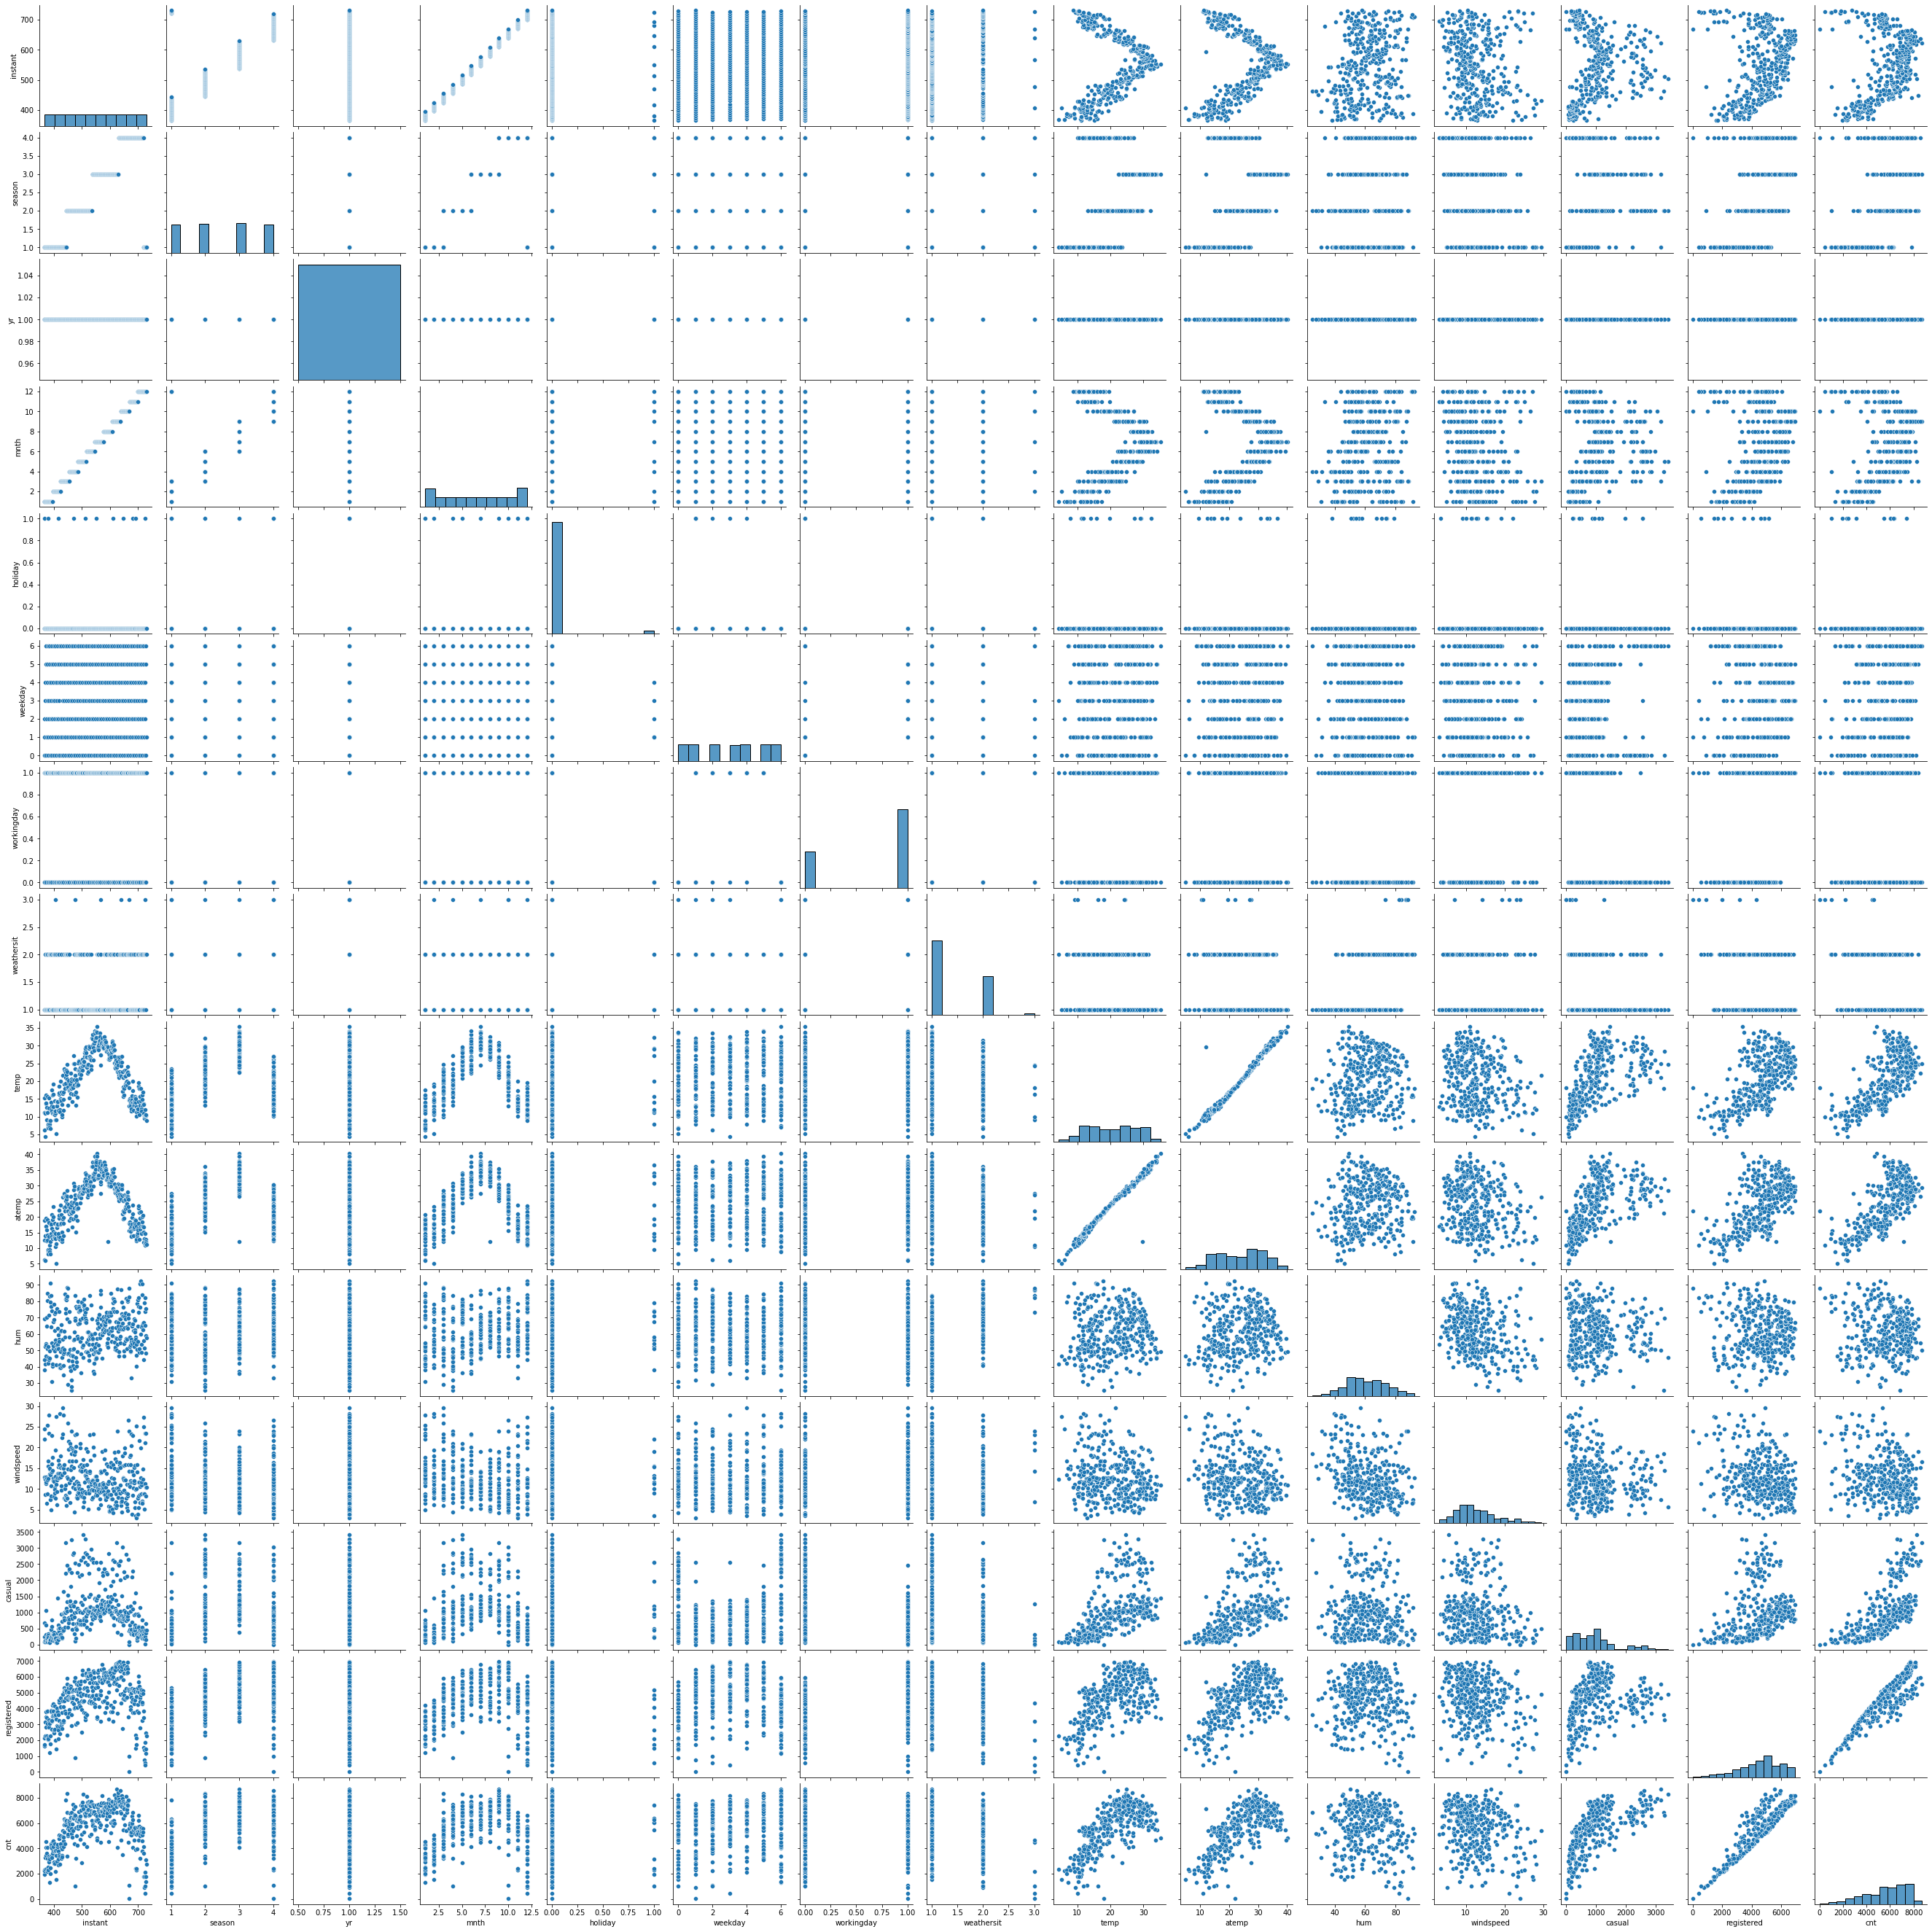

In [163]:
#Lets visualize the data
sns.pairplot(bikerenting)
plt.show()

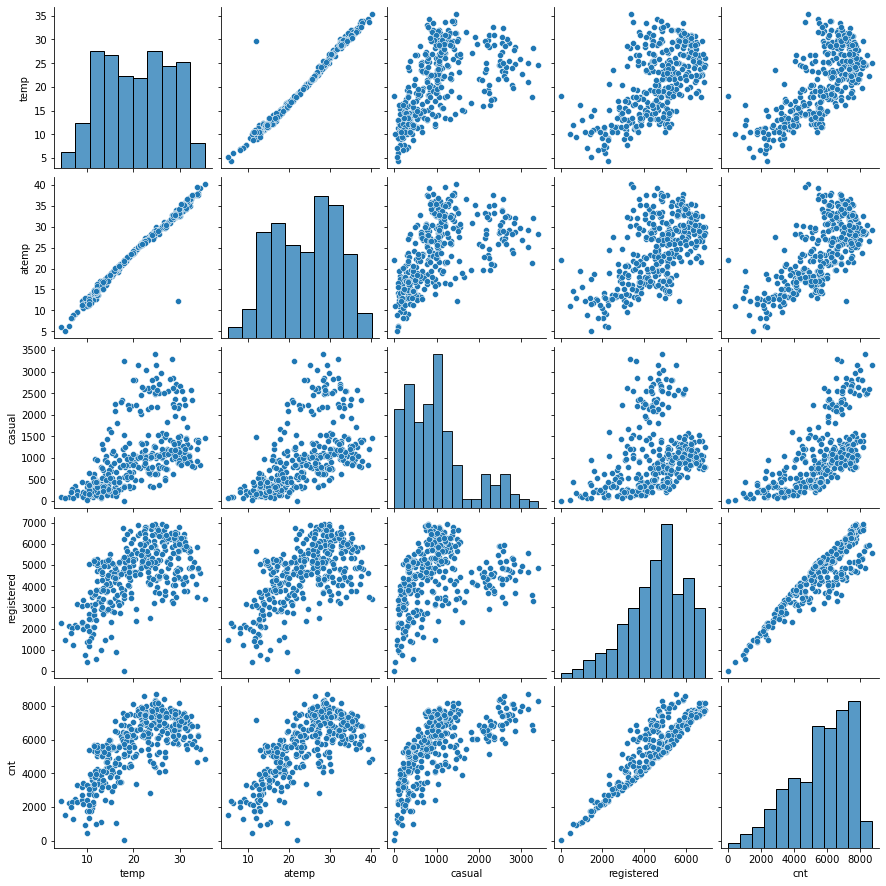

In [164]:
# there seems to be a positive correlation bettween the temperature and the number of rentals (either registered or casual)
sns.pairplot(bikerenting[['temp','atemp','casual','registered','cnt']])
plt.show()

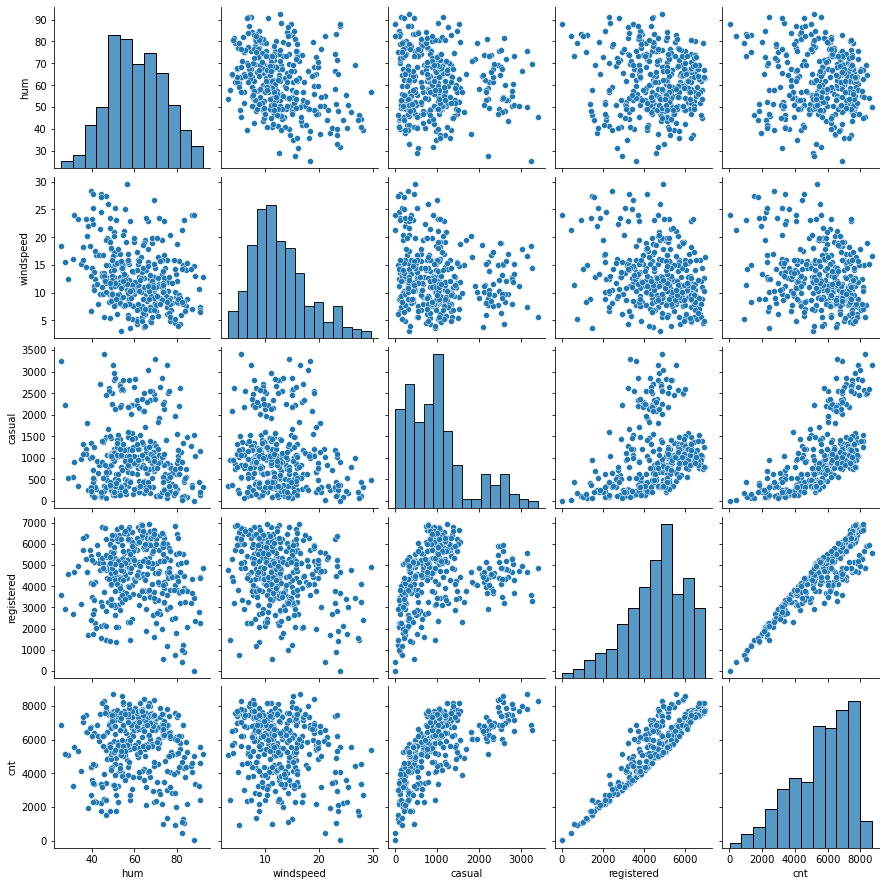

In [165]:
# it seems there isn't a relation between wind or humidity and number of rentals (either registered or casual)
sns.pairplot(bikerenting[['hum','windspeed','casual','registered','cnt']])
plt.show()

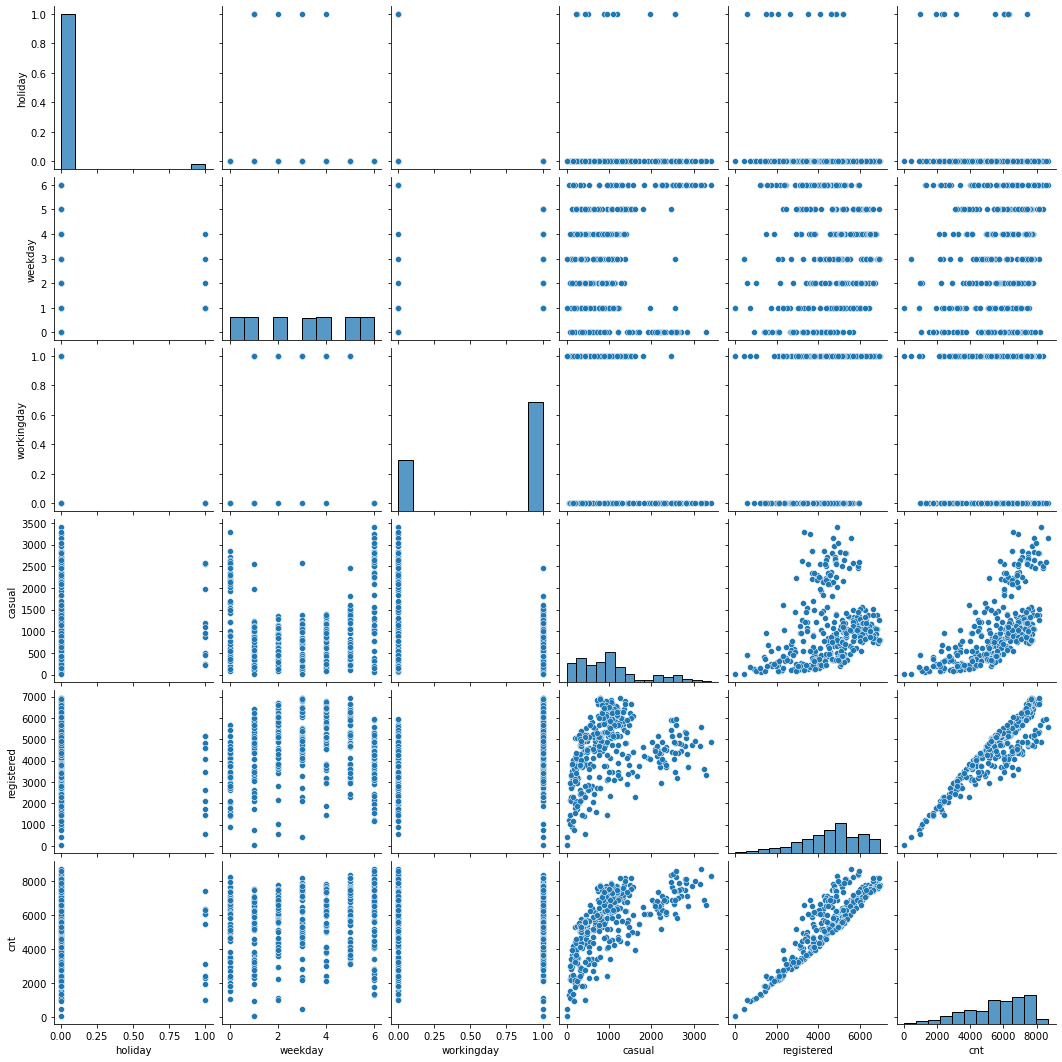

In [166]:
# The day of the week also seems to have some impact on the number of rentals
sns.pairplot(bikerenting[['holiday','weekday','workingday','casual','registered','cnt']])
plt.show()
#Because these are categorial variables we need use a diferent visualization

In [167]:
#visualize categorical variables

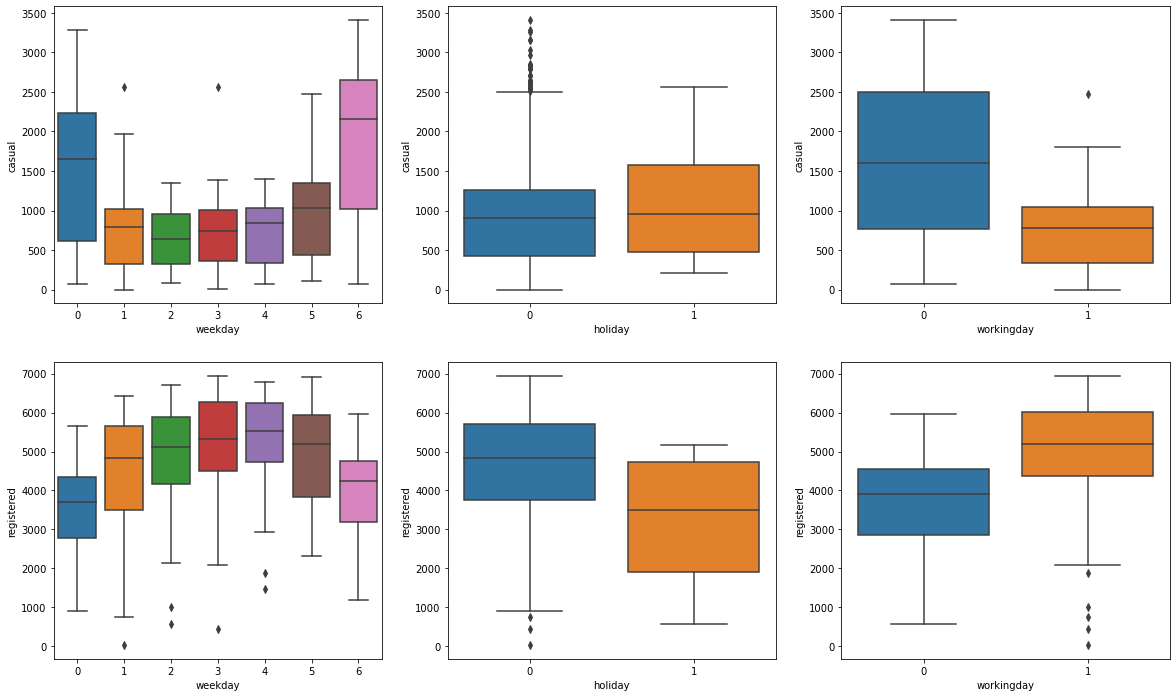

In [168]:
# Looking at the histograms bellow its clear that
# 1 - Registered users have less rentals on holidays while Causal users have more rentals on holidays
# 2 - Registered users have more rentals on working days  while Causal users have less rentals on working days

plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='weekday', y='casual', data=bikerenting)
plt.subplot(2,3,2)
sns.boxplot(x='holiday', y='casual', data=bikerenting)
plt.subplot(2,3,3)
sns.boxplot(x='workingday', y='casual', data=bikerenting)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='registered', data=bikerenting)
plt.subplot(2,3,5)
sns.boxplot(x='holiday', y='registered', data=bikerenting)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='registered', data=bikerenting)
plt.show()

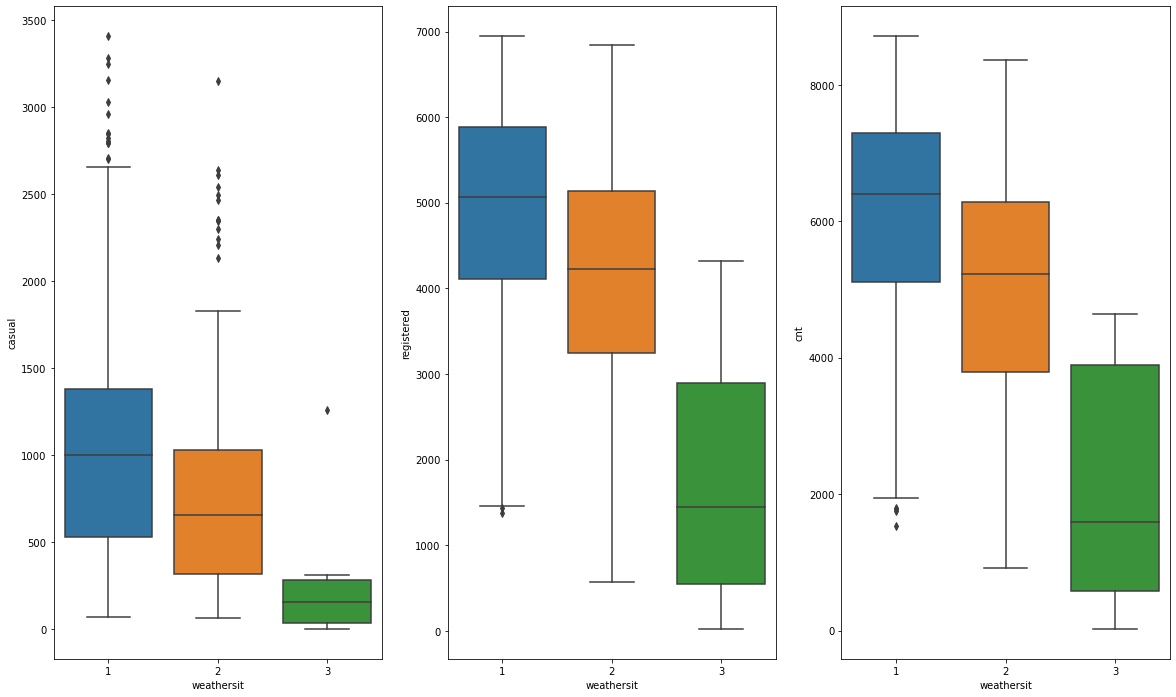

In [169]:
# Weather conditions seem to affect causal and registered users, if weather conditions deteriorate the number of rentals reduces.
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='weathersit', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='weathersit', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='weathersit', y='cnt', data=bikerenting)
plt.show()

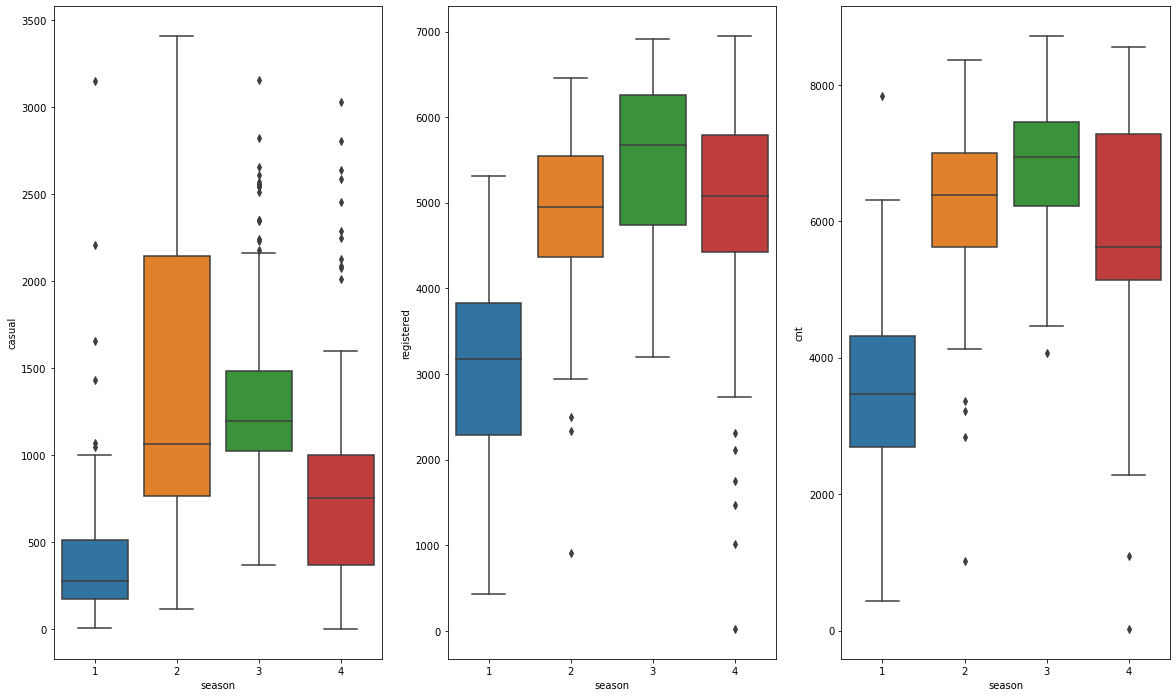

In [170]:
# Season also seems to have some influence on rentals: summer and fall have more rentals than spring and winter.
# Causal rentals occur evenly on summer and fall
plt.figure(figsize=(20,12))
plt.subplot(1,3,1)
sns.boxplot(x='season', y='casual', data=bikerenting)
plt.subplot(1,3,2)
sns.boxplot(x='season', y='registered', data=bikerenting)
plt.subplot(1,3,3)
sns.boxplot(x='season', y='cnt', data=bikerenting)
plt.show()

<AxesSubplot:xlabel='yr', ylabel='cnt'>

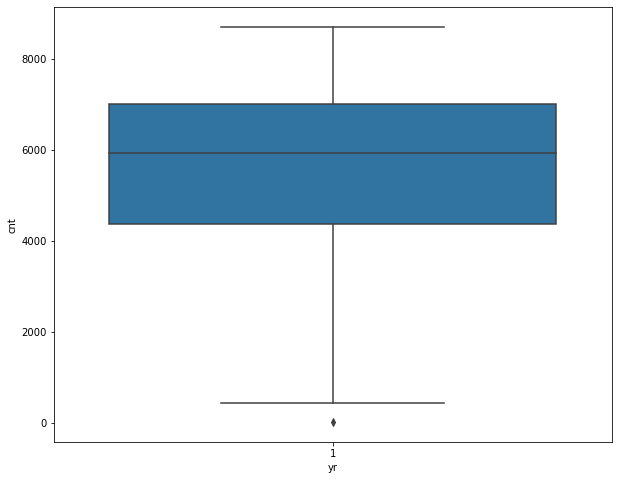

In [171]:
#Rentals are increasing from year 2018 to 2019, but is suficient storical data
plt.figure(figsize=(10,8))
sns.boxplot(x='yr', y='cnt', data=bikerenting)

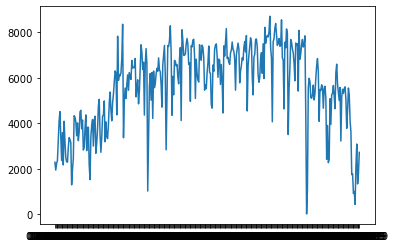

In [172]:
# based on the line chart bellow we do see a decrease at the end of 2019 so we cannot conclude there is a correlation betwee date
# and number of rentals
plt.plot(bikerenting['dteday'], bikerenting['cnt'])
plt.show()

#### Step 2 - Preparing data for modeling
 - encondig
 - spliting into train and test
 - rescaling

##### Step 2 - Encoding

In [173]:
# yes and no values are already converted to 0 and 1 at the data source ('day.csv')

In [174]:
# Variables "yr", "holiday" and "workingday" only had 2 possible values and are already handled correctly

In [175]:
# Dummmy variables - weathersit
weathersit = pd.get_dummies(bikerenting['weathersit'])
weathersit.columns = ['Sun', 'Clouds', 'Rain']
weathersit

,Sun,Clouds,Rain
365,1,0,0
366,1,0,0
367,1,0,0
368,0,1,0
369,1,0,0
...,...,...,...
725,0,1,0
726,0,1,0
727,0,1,0
728,1,0,0


In [176]:
# change 3 dummy collumns to 2 collumns. Why using 3 if we can use 2
#droping redundant dummy bar
weathersit = pd.get_dummies(bikerenting['weathersit'],drop_first=True)
weathersit.columns = ['clouds', 'rain']
weathersit.head()

,clouds,rain
365,0,0
366,0,0
367,0,0
368,1,0
369,0,0


In [177]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,weathersit], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
365,366,01-01-2019,1,1,1,0,0,0,1,15.170000,18.78105,69.2500,12.875189,686,1608,2294,0,0
366,367,02-01-2019,1,1,1,1,1,0,1,11.194763,12.61520,38.1304,22.087555,244,1707,1951,0,0
367,368,03-01-2019,1,1,1,0,2,1,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236,0,0
368,369,04-01-2019,1,1,1,0,3,1,2,4.407500,5.96685,41.4583,12.374900,95,2273,2368,1,0
369,370,05-01-2019,1,1,1,0,4,1,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272,0,0


In [178]:
#lets remove weathersit
bikerenting = bikerenting.drop('weathersit', axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain
365,366,01-01-2019,1,1,1,0,0,0,15.170000,18.78105,69.2500,12.875189,686,1608,2294,0,0
366,367,02-01-2019,1,1,1,1,1,0,11.194763,12.61520,38.1304,22.087555,244,1707,1951,0,0
367,368,03-01-2019,1,1,1,0,2,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236,0,0
368,369,04-01-2019,1,1,1,0,3,1,4.407500,5.96685,41.4583,12.374900,95,2273,2368,1,0
369,370,05-01-2019,1,1,1,0,4,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272,0,0


In [179]:
# Dummmy variables - season
season = pd.get_dummies(bikerenting['season'])
season.columns = ['spring', 'summer', 'fall','winter']
season.head()

,spring,summer,fall,winter
365,1,0,0,0
366,1,0,0,0
367,1,0,0,0
368,1,0,0,0
369,1,0,0,0


In [180]:
# change 4 dummy collumns to 3 collumns. Why using 4 if we can use 3
#droping redundant dummy bar
season = pd.get_dummies(bikerenting['season'],drop_first=True)
season.columns = ['summer', 'fall','winter']
season.head()

,summer,fall,winter
365,0,0,0
366,0,0,0
367,0,0,0
368,0,0,0
369,0,0,0


In [181]:
# join to original dataframe
bikerenting= pd.concat([bikerenting,season], axis=1)
bikerenting.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
365,366,01-01-2019,1,1,1,0,0,0,15.170000,18.78105,69.2500,12.875189,686,1608,2294,0,0,0,0,0
366,367,02-01-2019,1,1,1,1,1,0,11.194763,12.61520,38.1304,22.087555,244,1707,1951,0,0,0,0,0
367,368,03-01-2019,1,1,1,0,2,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236,0,0,0,0,0
368,369,04-01-2019,1,1,1,0,3,1,4.407500,5.96685,41.4583,12.374900,95,2273,2368,1,0,0,0,0
369,370,05-01-2019,1,1,1,0,4,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272,0,0,0,0,0


In [182]:
#lets remove season
bikerenting = bikerenting.drop('season', axis=1)
bikerenting.head()

,instant,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
365,366,01-01-2019,1,1,0,0,0,15.170000,18.78105,69.2500,12.875189,686,1608,2294,0,0,0,0,0
366,367,02-01-2019,1,1,1,1,0,11.194763,12.61520,38.1304,22.087555,244,1707,1951,0,0,0,0,0
367,368,03-01-2019,1,1,0,2,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236,0,0,0,0,0
368,369,04-01-2019,1,1,0,3,1,4.407500,5.96685,41.4583,12.374900,95,2273,2368,1,0,0,0,0
369,370,05-01-2019,1,1,0,4,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272,0,0,0,0,0


In [183]:
#We can drop weekday, year,month,instant, dteday
#lets remove season
bikerenting = bikerenting.drop('yr', axis=1)
bikerenting = bikerenting.drop('mnth', axis=1)
bikerenting = bikerenting.drop('weekday', axis=1)
bikerenting = bikerenting.drop('instant', axis=1)
bikerenting = bikerenting.drop('dteday', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,clouds,rain,summer,fall,winter
365,0,0,15.170000,18.78105,69.2500,12.875189,686,1608,2294,0,0,0,0,0
366,1,0,11.194763,12.61520,38.1304,22.087555,244,1707,1951,0,0,0,0,0
367,0,1,6.150000,6.31375,44.1250,24.499957,89,2147,2236,0,0,0,0,0
368,0,1,4.407500,5.96685,41.4583,12.374900,95,2273,2368,1,0,0,0,0
369,0,1,10.899153,13.92060,52.4167,8.709129,140,3132,3272,0,0,0,0,0


In [184]:
# lets drop registered and causals since the study is the target variable "cnt"
bikerenting = bikerenting.drop('casual', axis=1)
bikerenting = bikerenting.drop('registered', axis=1)
bikerenting.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
365,0,0,15.170000,18.78105,69.2500,12.875189,2294,0,0,0,0,0
366,1,0,11.194763,12.61520,38.1304,22.087555,1951,0,0,0,0,0
367,0,1,6.150000,6.31375,44.1250,24.499957,2236,0,0,0,0,0
368,0,1,4.407500,5.96685,41.4583,12.374900,2368,1,0,0,0,0
369,0,1,10.899153,13.92060,52.4167,8.709129,3272,0,0,0,0,0


##### Step 2 - split data into train and test

In [185]:
bikerenting_train, bikerenting_test = train_test_split(bikerenting,train_size = 0.7,random_state=100)
print(bikerenting_train.shape)
print(bikerenting_test.shape)

(255, 12)
(110, 12)


##### Step 2 - rescale

In [186]:
# There are very diferent values, for exmeple "temp" and "causal", we should rescale
# we want all variable to be at comparable scales, for interpretability reasosn
# if we use min max we compress the data between 0 and 1 
scaler = MinMaxScaler()

# we only want to scale numerical
# create list of only numerical lables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#fit data
# there are 3 types
# fit() learns xmin and xmax
# transform()
# fit_transform() does both

bikerenting_train[num_vars] = scaler.fit_transform(bikerenting_train[num_vars])
bikerenting_train.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
691,0,1,0.340801,0.402361,0.438976,0.256692,0.447308,0,0,0,0,1
375,0,1,0.207548,0.263036,0.877953,0.214151,0.247929,1,0,0,0,0
539,0,0,0.871461,0.831370,0.297901,0.250372,0.790267,0,0,0,1,0
483,0,0,0.468160,0.505944,0.467847,0.177908,0.722734,0,0,1,0,0
607,0,1,0.900943,0.853361,0.468504,0.308633,0.843074,0,0,0,1,0


##### Step 3 - Training the model

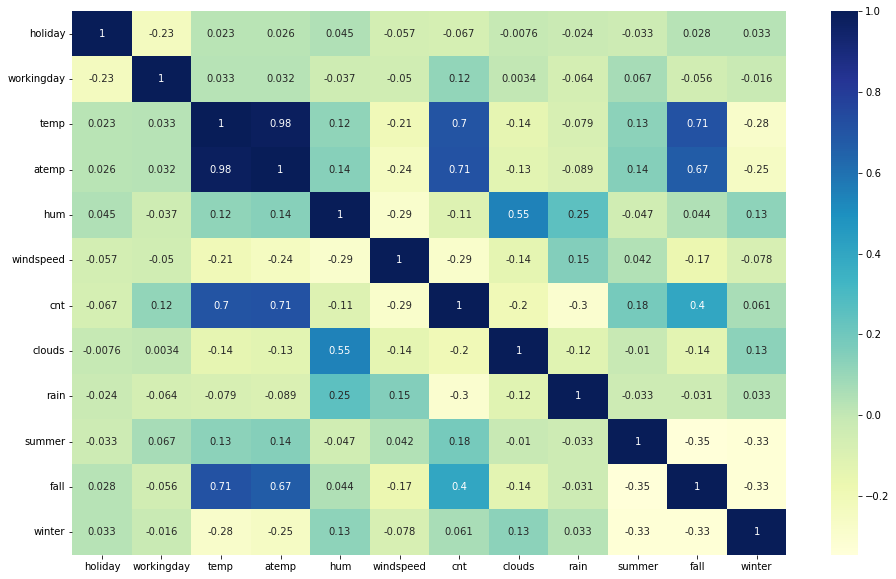

In [187]:
# lets draw heat map
# it will teal us that there is a coorelation between temperature and rentals like we suspected from the data visualization
plt.figure(figsize= (16,10))
sns.heatmap(bikerenting_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

In [188]:
# we need to separate the X from Y
y_train = bikerenting_train.pop('cnt')
y_train.head()


691    0.447308
375    0.247929
539    0.790267
483    0.722734
607    0.843074
Name: cnt, dtype: float64

In [189]:
X_train = bikerenting_train
X_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
691,0,1,0.340801,0.402361,0.438976,0.256692,0,0,0,0,1
375,0,1,0.207548,0.263036,0.877953,0.214151,1,0,0,0,0
539,0,0,0.871461,0.831370,0.297901,0.250372,0,0,0,1,0
483,0,0,0.468160,0.505944,0.467847,0.177908,0,0,1,0,0
607,0,1,0.900943,0.853361,0.468504,0.308633,0,0,0,1,0


In [190]:
# we need to check statistical significant of variables
# if independent variables (predictors) are correlated we need to rmeove them form the model, because they don't add value to it.
# we could go variable by variable or qe can do it in one action
# buil model with all variables
X_train_sm = sm.add_constant(X_train)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.388530
holiday      -0.116042
workingday    0.020715
temp          0.412276
atemp         0.130799
hum          -0.154752
windspeed    -0.137891
clouds       -0.041456
rain         -0.264946
summer        0.124167
fall          0.067228
winter        0.193094
dtype: float64

In [191]:
#lets determine p values. p values above 0.5 are significant
# we will see that temperature is significant
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     60.13
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           5.66e-63
Time:                        21:21:40   Log-Likelihood:                 212.22
No. Observations:                 255   AIC:                            -400.4
Df Residuals:                     243   BIC:                            -357.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3885      0.036     10.774      0.000       0.317       0.460
holiday       -0.1160      0.046     -2.521      0.012      -0.207      -0.025
workingday     0.0207      0.015      1.362      0.174      -0.009       0.051
temp           0.4123      0.157      2.618      0.009       0.102       0.722
atemp          0.1308      0.162      0.809      0.420      -0.188       0.449
hum           -0.1548      0.045     -3.406      0.001      -0.244      -0.065
windspeed     -0.1379      0.037     -3.715      0.000      -0.211      -0.065
clouds        -0.0415      0.019     -2.208      0.028      -0.078      -0.004
rain          -0.2649      0.051     -5.160      0.000      -0.366      -0.164
summer         0.1242      0.024      5.083      0.000       0.076       0.172
fall           0.0672      0.034      1.981      0.049       0.000       0.134
winter         0.1931      0.021      9.329      0.000       0.152       0.234
==============================================================================
Omnibus:                       22.506   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.493
Skew:                          -0.592   Prob(JB):                     1.45e-07
Kurtosis:                       4.250   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [192]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,atemp,179.71
2,temp,177.13
4,hum,10.87
9,fall,6.43
8,summer,3.38
1,workingday,3.14
5,windspeed,3.00
6,clouds,2.73
10,winter,2.22
7,rain,1.32


In [193]:
# what collumn should we drop? 

## high p-value and high VIF »»» Drop
## high p-value and low VIF »»» remove these first
## low p-value and high VIF »»» remove these after
## low p-value and low VIF »»» we keep

# what collumn should we drop? "atemp" that has big p value or "temp" with VIF very high?

# we should remove "atemp"
X = X_train.drop('atemp',axis=1)

In [194]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.398403
holiday      -0.116079
workingday    0.020401
temp          0.532413
hum          -0.153047
windspeed    -0.143154
clouds       -0.041471
rain         -0.266765
summer        0.124698
fall          0.064416
winter        0.193885
dtype: float64

In [195]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     66.17
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           9.34e-64
Time:                        21:21:43   Log-Likelihood:                 211.88
No. Observations:                 255   AIC:                            -401.8
Df Residuals:                     244   BIC:                            -362.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3984      0.034     11.750      0.000       0.332       0.465
holiday       -0.1161      0.046     -2.524      0.012      -0.207      -0.025
workingday     0.0204      0.015      1.343      0.181      -0.010       0.050
temp           0.5324      0.052     10.223      0.000       0.430       0.635
hum           -0.1530      0.045     -3.374      0.001      -0.242      -0.064
windspeed     -0.1432      0.037     -3.920      0.000      -0.215      -0.071
clouds        -0.0415      0.019     -2.210      0.028      -0.078      -0.005
rain          -0.2668      0.051     -5.204      0.000      -0.368      -0.166
summer         0.1247      0.024      5.111      0.000       0.077       0.173
fall           0.0644      0.034      1.910      0.057      -0.002       0.131
winter         0.1939      0.021      9.384      0.000       0.153       0.235
==============================================================================
Omnibus:                       21.136   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.216
Skew:                          -0.566   Prob(JB):                     4.53e-07
Kurtosis:                       4.211   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,18.53
3,hum,10.23
8,fall,6.35
7,summer,3.38
1,workingday,3.12
4,windspeed,2.98
5,clouds,2.73
9,winter,2.19
6,rain,1.31
0,holiday,1.08


In [197]:
# we should remove "fall"
X = X.drop('fall',axis=1)

In [198]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.395253
holiday      -0.117117
workingday    0.017269
temp          0.612335
hum          -0.163150
windspeed    -0.150456
clouds       -0.038987
rain         -0.258360
summer        0.090244
winter        0.173102
dtype: float64

In [199]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     72.33
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           6.37e-64
Time:                        21:21:51   Log-Likelihood:                 209.99
No. Observations:                 255   AIC:                            -400.0
Df Residuals:                     245   BIC:                            -364.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3953      0.034     11.608      0.000       0.328       0.462
holiday       -0.1171      0.046     -2.533      0.012      -0.208      -0.026
workingday     0.0173      0.015      1.137      0.257      -0.013       0.047
temp           0.6123      0.031     19.642      0.000       0.551       0.674
hum           -0.1632      0.045     -3.602      0.000      -0.252      -0.074
windspeed     -0.1505      0.037     -4.121      0.000      -0.222      -0.079
clouds        -0.0390      0.019     -2.072      0.039      -0.076      -0.002
rain          -0.2584      0.051     -5.032      0.000      -0.359      -0.157
summer         0.0902      0.017      5.463      0.000       0.058       0.123
winter         0.1731      0.018      9.803      0.000       0.138       0.208
==============================================================================
Omnibus:                       20.368   Durbin-Watson:                   1.854
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.681
Skew:                          -0.527   Prob(JB):                     3.59e-07
Kurtosis:                       4.297   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [200]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
3,hum,9.95
2,temp,5.79
1,workingday,3.06
4,windspeed,2.88
5,clouds,2.71
8,winter,1.54
7,summer,1.51
6,rain,1.30
0,holiday,1.08


In [201]:
# we should remove "hum"
X = X.drop('hum',axis=1)

In [202]:
#create a new model
# buil model with all variables
X_train_sm = sm.add_constant(X)

#create the second model
lr = sm.OLS(y_train,X_train_sm)

#fit
lr_model = lr.fit()

# lets check params
lr_model.params

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const         0.331683
holiday      -0.124620
workingday    0.018997
temp          0.582167
windspeed    -0.113673
clouds       -0.081403
rain         -0.342465
summer        0.091831
winter        0.167146
dtype: float64

In [203]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     76.05
Date:                Tue, 14 Jun 2022   Prob (F-statistic):           3.67e-62
Time:                        21:21:51   Log-Likelihood:                 203.41
No. Observations:                 255   AIC:                            -388.8
Df Residuals:                     246   BIC:                            -356.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3317      0.030     11.123      0.000       0.273       0.390
holiday       -0.1246      0.047     -2.635      0.009      -0.218      -0.031
workingday     0.0190      0.016      1.222      0.223      -0.012       0.050
temp           0.5822      0.031     18.932      0.000       0.522       0.643
windspeed     -0.1137      0.036     -3.167      0.002      -0.184      -0.043
clouds        -0.0814      0.015     -5.416      0.000      -0.111      -0.052
rain          -0.3425      0.047     -7.313      0.000      -0.435      -0.250
summer         0.0918      0.017      5.431      0.000       0.059       0.125
winter         0.1671      0.018      9.284      0.000       0.132       0.203
==============================================================================
Omnibus:                       16.015   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.815
Skew:                          -0.471   Prob(JB):                     3.02e-05
Kurtosis:                       4.035   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [204]:
# lets search for colinearity calculating VIF = 1 / (1 - Rsquare)
vif = pd.DataFrame()
vif['features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,features,VIF
2,temp,3.31
1,workingday,2.97
3,windspeed,2.85
6,summer,1.51
4,clouds,1.50
7,winter,1.42
0,holiday,1.07
5,rain,1.07


In [205]:
# VIF values are now bellow 5 and p values are low we have our model.

#### Step 4 - residual analisys

In [208]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

691    0.687050
375    0.365761
539    0.810559
483    0.675838
607    0.840096
         ...   
708    0.649083
724    0.025953
688    0.629248
645    0.462396
373    0.333873
Length: 255, dtype: float64

C:\Users\SergioFontes\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

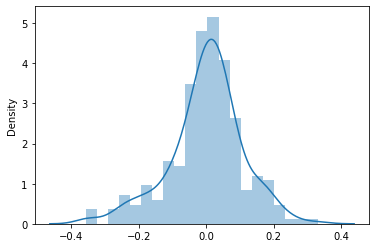

In [209]:
# let see if error distribution is normal and centered on zero
res = y_train - y_train_pred
sns.distplot(res)

### Step 5 - Predictions and Evaluation

In [210]:
# we never fit on the test set (only the training)
# we transform the training set 

num_vars = ['temp','atemp','hum','windspeed','cnt']
bikerenting_test[num_vars] = scaler.transform(bikerenting_test[num_vars])
bikerenting_test.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
512,1,0,0.827830,0.838696,0.608268,0.379504,0.692706,0,0,1,0,0
490,0,0,0.615566,0.646224,0.708661,0.261397,0.729061,1,0,1,0,0
679,0,0,0.415094,0.464698,0.581365,0.204729,0.785780,0,0,0,0,1
421,0,0,0.214623,0.241964,0.188976,0.401554,0.387368,0,0,0,0,0
606,0,1,0.819576,0.800190,0.473098,0.077148,0.884837,0,0,0,1,0


In [211]:
bikerenting_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,clouds,rain,summer,fall,winter
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000
mean,0.045455,0.663636,0.537635,0.557094,0.500025,0.340662,0.657728,0.281818,0.0,0.236364,0.263636,0.245455
std,0.209252,0.474627,0.257202,0.233681,0.203101,0.180581,0.207991,0.451944,0.0,0.426792,0.442621,0.432326
min,0.000000,0.000000,-0.028302,0.025669,-0.056430,0.028350,0.123562,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.306014,0.360195,0.343069,0.220866,0.501898,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.577830,0.607237,0.483268,0.310996,0.704268,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.748526,0.739471,0.635991,0.445613,0.843851,1.000000,0.0,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.038915,1.021078,0.969161,0.861382,0.963300,1.000000,0.0,1.000000,1.000000,1.000000


In [212]:
y_test =bikerenting_test.pop('cnt')
X_test = bikerenting_test
#add constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

C:\Users\SergioFontes\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,holiday,workingday,temp,atemp,hum,windspeed,clouds,rain,summer,fall,winter
512,1.0,1,0,0.827830,0.838696,0.608268,0.379504,0,0,1,0,0
490,1.0,0,0,0.615566,0.646224,0.708661,0.261397,1,0,1,0,0
679,1.0,0,0,0.415094,0.464698,0.581365,0.204729,0,0,0,0,1
421,1.0,0,0,0.214623,0.241964,0.188976,0.401554,0,0,0,0,0
606,1.0,0,1,0.819576,0.800190,0.473098,0.077148,0,0,0,1,0


In [213]:
X_test_sm = X_test_sm.drop(['hum','fall','atemp'], axis=1)

In [214]:
#predict

y_test_pred = lr_model.predict(X_test_sm)

In [215]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred= y_test_pred)

0.6977963758640666

###### Based on r2 only 70% of the variance on our model is explained by the independent variables